# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,average_precision_score,cohen_kappa_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,precision_recall_curve
import _pickle as cPickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
plt.style.use('fivethirtyeight')

In [2]:
path='./data/creditcard.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Visualizing Data

Class as pie chart:


Text(0, 0.5, '')

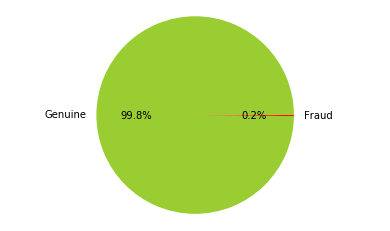

In [6]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

## Checking features

### Feature Time

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# Transactions')

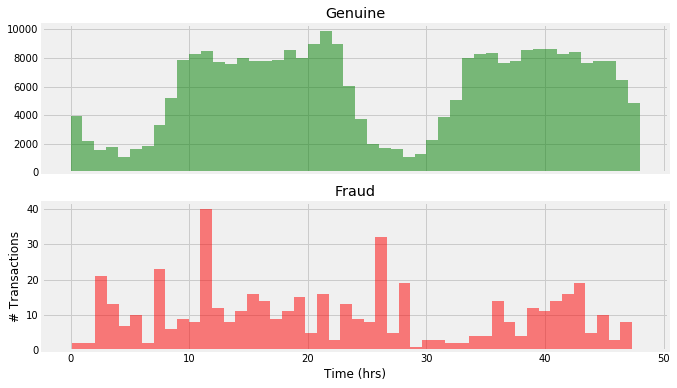

In [7]:
print("Time variable")
data["Time_Hr"] = data["Time"]/3600 # convert to hours
print(data["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# Transactions')

#### This shows that number of transactions have similar dependence on time of the day for both classes. So it doesn't hold any predictive power.

In [8]:
data = data.drop(['Time'],axis=1)

### Feature Amount

Text(0, 0.5, '# transactions')

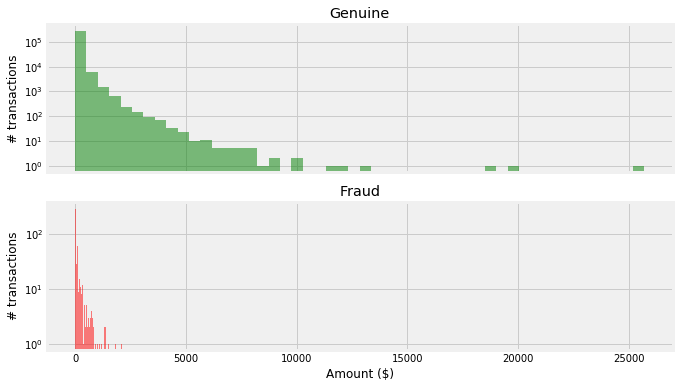

In [9]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(data.Amount[data.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

### Their are transactions of more than 10k in legit case only so this is an feature to check for fraud detection.

### Checking all V1 to V28 features
Ploting relation between classes in variables

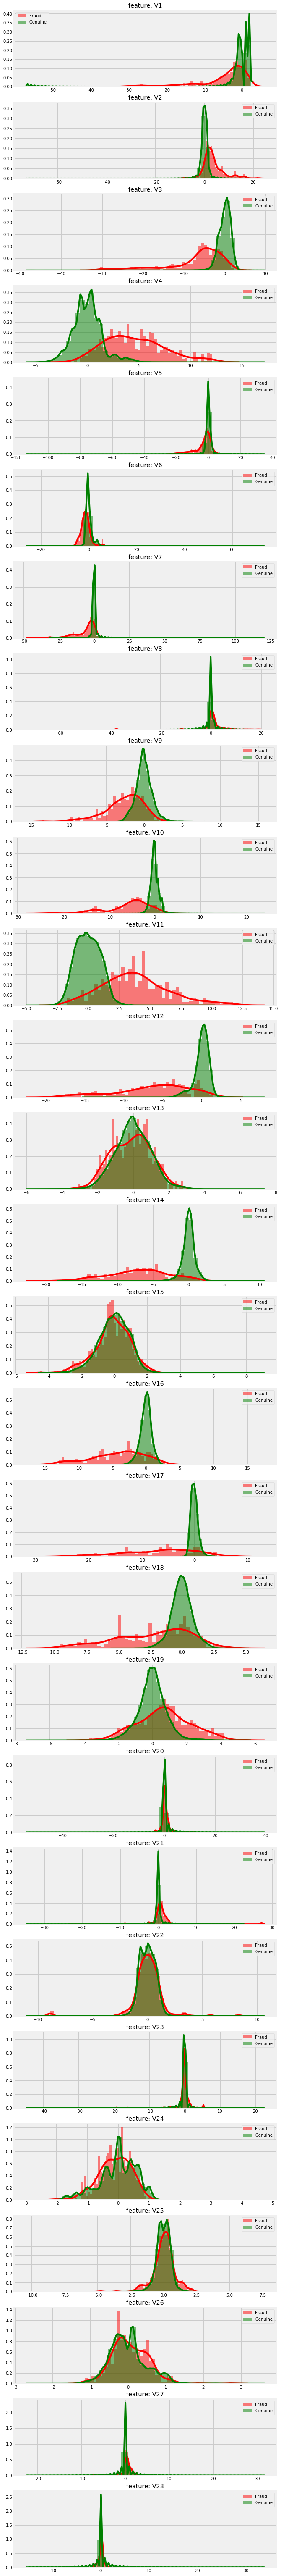

In [10]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(10,28*4))
for i, col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r',hist_kws=dict(alpha=0.5),label="Fraud")
    sns.distplot(data[col][data.Class == 0], bins=50, color='g',hist_kws=dict(alpha=0.5),label="Genuine")
    ax5.set_xlabel('')
    plt.legend()
    ax5.set_title('feature: ' + str(col))
plt.show()

**Thing to be observe is that in features V13,V15,V22,V26,V25 and V23 we are not getting any change in distribution of both classes so they do not have any prediction power so we can drop that features.**

In [53]:
drop_list = ['Time_Hr','V13','V15','V22','V26','V25','V23']

## Applying Standardization

There is a large difference in values of Variable amount and other variable so we need to scale amount variable. For that we are using standard scalar which will scale the values to mean 0 and standard deviation 1.

In [14]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

## Train-Test Split

#### Spliting data into 80-20 ration of training and testing

In [15]:
def split_data(df,drop_list):
    df=df.drop(drop_list,axis=1)
    X=df[df['Class']==1]
    Y=df[df['Class']==0]
    X=df.drop(['Class'], axis = 1) 
    Y=df["Class"] 
    xData = X.values 
    yData = Y.values 
    xTrain, xTest, yTrain, yTest = train_test_split( 
            xData, yData, test_size = 0.2, random_state = 42)
    return xTrain, xTest, yTrain, yTest

In [54]:
x_Train,x_Test,y_Train,y_Test=split_data(data,drop_list)

### Creating Scores dictionary to store precision,recall and f1_scores

In [22]:
scores={}

### Print Score Function

In [20]:
def addValues(model_name,y_test,y_pred,y_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_prob[:,1])
    scores.update({model_name : {
        'precision_score' : precision_score(y_test,y_pred),
        'recall_score' : recall_score(y_test,y_pred),
        'f1_score' : f1_score(y_test,y_pred),
        'AUC_score': auc(recall,precision),
        'ROC_AUC_score': roc_auc_score(y_test, y_prob[:,1]),
        'kappa': cohen_kappa_score(y_test,y_pred)
    }})

In [21]:
def print_scores(y_test,y_pred,y_pred_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_pred_prob[:,1])
    print('precision_score : ',precision_score(y_test,y_pred))
    print('recall_score : ',recall_score(y_test,y_pred))
    print('f1 score : ', f1_score(y_test,y_pred))
    print('AUC score : ', auc(recall,precision))
    print('ROC_AUC score : ', roc_auc_score(y_test, y_pred_prob[:,1]))
    print('kappa : ', cohen_kappa_score(y_test,y_pred))


## Naive Bayes Algorithm

**p(A/B) = p(B/A)*p(A) / p(B)**

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
NBclf=GaussianNB()

In [58]:
NBclf.fit(x_Train,y_Train)

GaussianNB()

In [59]:
NB_pred,NB_pred_prob=NBclf.predict(x_Test),NBclf.predict_proba(x_Test)

In [60]:
NB_precision,NB_recall,_ = precision_recall_curve(y_Test,NB_pred_prob[:,1])

In [61]:
addValues('Naive Bayes',y_Test,NB_pred,NB_pred_prob)

In [62]:
print_scores(y_Test,NB_pred,NB_pred_prob)

precision_score :  0.06506024096385542
recall_score :  0.826530612244898
f1 score :  0.12062546537602382
AUC score :  0.42520571268734436
ROC_AUC score :  0.9653941592112366
kappa :  0.11781145564701279


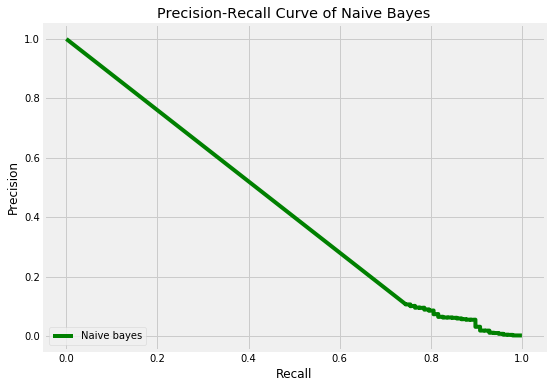

In [63]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Naive Bayes')
plt.plot(NB_recall, NB_precision, label='Naive bayes',color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression(C = 0.01, penalty = 'l2',max_iter=1000)

In [66]:
lr.fit(x_Train, y_Train)

LogisticRegression(C=0.01, max_iter=1000)

In [67]:
lr_pred,lr_prob=lr.predict(x_Test),lr.predict_proba(x_Test)

In [68]:
lr_precision,lr_recall,_ = precision_recall_curve(y_Test,lr_prob[:,1])

In [69]:
addValues("Logistic Regression",y_Test,lr_pred,lr_prob)

In [70]:
print_scores(y_Test,lr_pred,lr_prob)

precision_score :  0.8571428571428571
recall_score :  0.5510204081632653
f1 score :  0.670807453416149
AUC score :  0.7568983911646903
ROC_AUC score :  0.9766738469445178
kappa :  0.6703636193303426


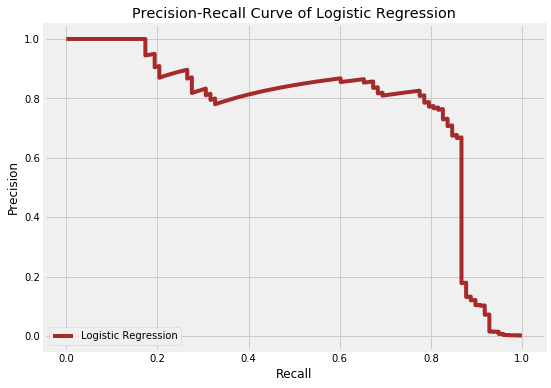

In [71]:
plt.figure(figsize=(8,6))
plt.plot(lr_recall, lr_precision, label='Logistic Regression',color='brown')
plt.title('Precision-Recall Curve of Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Linear Discriminant Analysis

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
lda_clf=LinearDiscriminantAnalysis()

In [74]:
lda_clf.fit(x_Train,y_Train)

LinearDiscriminantAnalysis()

In [75]:
lda_pred, lda_prob = lda_clf.predict(x_Test),lda_clf.predict_proba(x_Test)

In [76]:
lda_precision,lda_recall,_ = precision_recall_curve(y_Test,lda_prob[:,1])

In [77]:
addValues("Linear Discriminant Analysis",y_Test,lda_pred,lda_prob)

In [78]:
print_scores(y_Test,lda_pred,lda_prob)

precision_score :  0.8690476190476191
recall_score :  0.7448979591836735
f1 score :  0.8021978021978022
AUC score :  0.7854666059243139
ROC_AUC score :  0.9798610074305468
kappa :  0.8018831722157707


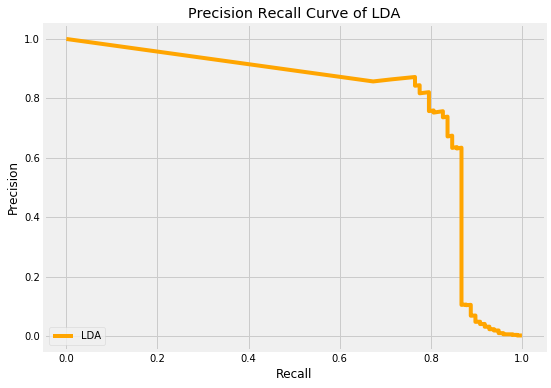

In [79]:
plt.figure(figsize=(8,6))
plt.plot(lda_recall, lda_precision, label='LDA',color='orange')
plt.title('Precision Recall Curve of LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
Dtree = DecisionTreeClassifier()

In [576]:
Dtree.fit(x_Train,y_Train)

DecisionTreeClassifier()

In [439]:
with open('Normal/DecisionTree.pkl', 'wb') as fid:
    cPickle.dump(Dtree, fid)

In [82]:
with open('Normal/DecisionTree.pkl', 'rb') as fid:
    Dtree = cPickle.load(fid)

In [83]:
x_Train.shape

(227845, 23)

In [84]:
DT_preds,DT_probs = Dtree.predict(x_Test),Dtree.predict_proba(x_Test)

In [85]:
DT_precision,DT_recall,_ = precision_recall_curve(y_Test,DT_probs[:,1])

In [86]:
addValues("Decision Tree",y_Test,DT_preds,DT_probs)

In [87]:
print_scores(y_Test,DT_preds,DT_probs)

precision_score :  0.7222222222222222
recall_score :  0.7959183673469388
f1 score :  0.7572815533980582
AUC score :  0.7592458504181608
ROC_AUC score :  0.8976953963915336
kappa :  0.7568429072507787


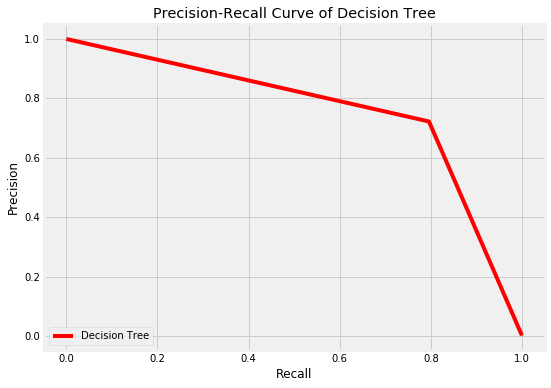

In [88]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Decision Tree')
plt.plot(DT_recall, DT_precision, label='Decision Tree',color='Red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Random Forest

### Applying Ensemble techniques

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RF_clf = RandomForestClassifier()

In [447]:
RF_clf.fit(x_Train, y_Train)

RandomForestClassifier()

In [448]:
with open('Normal/RandomForest.pkl', 'wb') as fid:
    cPickle.dump(RF_clf, fid)

In [91]:
with open('Normal/RandomForest.pkl', 'rb') as fid:
    RF_clf = cPickle.load(fid)

In [92]:
RF_pred,RF_prob = RF_clf.predict(x_Test),RF_clf.predict_proba(x_Test)

In [93]:
RF_precision,RF_recall,_ = precision_recall_curve(y_Test,RF_prob[:,1])

In [94]:
addValues("Random Forest Classifier",y_Test,RF_pred,RF_prob)

In [95]:
print_scores(y_Test,RF_pred,RF_prob)

precision_score :  0.975
recall_score :  0.7959183673469388
f1 score :  0.8764044943820225
AUC score :  0.8664394904360396
ROC_AUC score :  0.9524128640623385
kappa :  0.8762130618924813


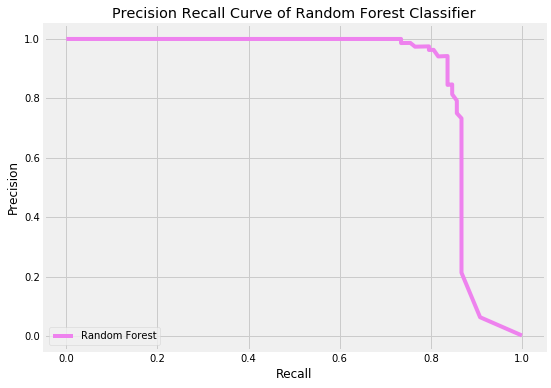

In [96]:
plt.figure(figsize=(8,6))
plt.title('Precision Recall Curve of Random Forest Classifier')
plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


### Support Vector Machine

In [97]:
from sklearn.svm import SVC

In [98]:
clf = SVC(probability=True)

In [477]:
clf.fit(x_Train,y_Train)

SVC(probability=True)

In [478]:
with open('Normal/SVM.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

In [99]:
with open('Normal/SVM.pkl', 'rb') as fid:
    SVMclf = cPickle.load(fid)

In [100]:
SVM_pred,SVM_prob=SVMclf.predict(x_Test),SVMclf.predict_proba(x_Test)

In [101]:
SVM_precision,SVM_recall,_ = precision_recall_curve(y_Test,SVM_prob[:,1])

In [102]:
addValues("SVM",y_Test,SVM_pred,SVM_prob)

In [103]:
print_scores(y_Test,SVM_pred,SVM_prob)

precision_score :  0.96875
recall_score :  0.6326530612244898
f1 score :  0.7654320987654322
AUC score :  0.849137593752196
ROC_AUC score :  0.9452490654393441
kappa :  0.7651128015365751


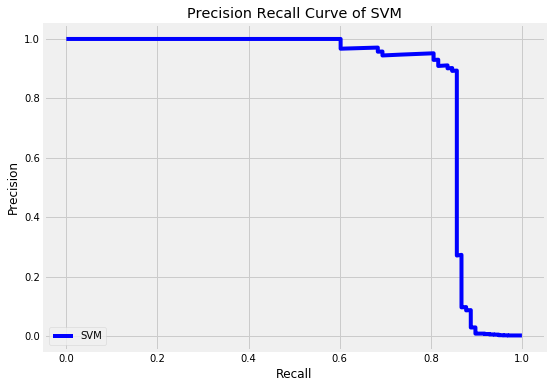

In [104]:
plt.figure(figsize=(8,6))
plt.plot(SVM_recall, SVM_precision, label='SVM',color='blue')
plt.title('Precision Recall Curve of SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## DNN

In [105]:
import keras
from keras import layers
from keras.models import load_model

In [106]:

model = keras.Sequential([
layers.Dense(input_dim = 23,units= 23, activation = 'relu'),
layers.Dense(units = 20,activation = 'relu'),

layers.Dropout(0.5),

layers.Dense(units = 16,activation = 'relu'),

layers.Dense(units =1, activation = 'sigmoid'),])

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                552       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,385
Trainable params: 1,385
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_Train, y_Train, batch_size = 16, epochs = 5)

Epoch 1/5
14241/14241 [==============================] - 13s 894us/step - loss: 0.0080 - accuracy: 0.9987
Epoch 2/5
14241/14241 [==============================] - 13s 890us/step - loss: 0.0042 - accuracy: 0.9992
Epoch 3/5
14241/14241 [==============================] - 13s 887us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/5
14241/14241 [==============================] - 13s 906us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
14241/14241 [==============================] - 13s 893us/step - loss: 0.0035 - accuracy: 0.9993


In [241]:
model.save('Normal/first.h5')

In [108]:
model = load_model('Normal/first.h5')

In [109]:
Dnn_preds,Dnn_prob= model.predict(x_Test),model.predict_proba(x_Test)

Instructions for updating:
Please use `model.predict()` instead.


In [110]:
DNN_precision,DNN_recall,_ = precision_recall_curve(y_Test,Dnn_prob)

scores.update({'DNN' : {
        'precision_score' : precision_score(y_Test,Dnn_preds.round()),
        'recall_score' : recall_score(y_Test,Dnn_preds.round()),
        'f1_score' : f1_score(y_Test,Dnn_preds.round()),
        'AUC_score': auc(DNN_recall,DNN_precision),
        'ROC_AUC_score': roc_auc_score(y_Test, Dnn_prob),
        'kappa': cohen_kappa_score(y_Test,Dnn_preds.round())
    }})

In [111]:
scores['DNN']

{'precision_score': 0.8860759493670886,
 'recall_score': 0.7142857142857143,
 'f1_score': 0.7909604519774011,
 'AUC_score': 0.8427703722384431,
 'ROC_AUC_score': 0.9869125618733706,
 'kappa': 0.790638922635716}

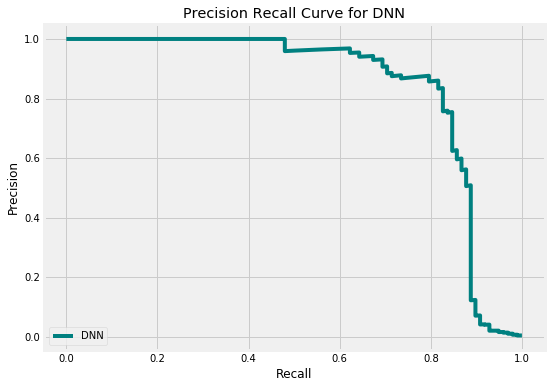

In [112]:
plt.figure(figsize=(8,6))
plt.plot(DNN_recall, DNN_precision, label='DNN',color='teal')
plt.title('Precision Recall Curve for DNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Measuring Performance

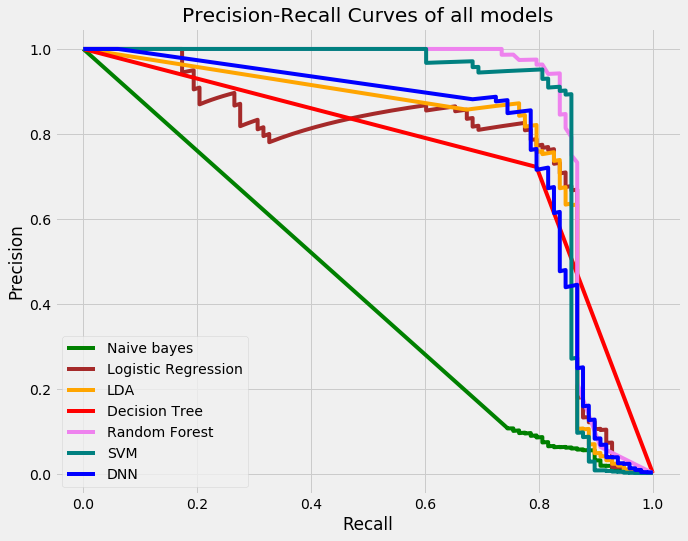

In [541]:
plt.figure(figsize=(10,8))
plt.plot(NB_recall, NB_precision, label='Naive bayes',color='green')
plt.plot(LR_recall, LR_precision, label='Logistic Regression',color='brown')
plt.plot(LDA_recall, LDA_precision, label='LDA',color='orange')
plt.plot(DT_recall, DT_precision, label='Decision Tree',color='Red')
plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.plot(SVM_recall, SVM_precision, label='SVM',color='teal')
plt.plot(DNN_recall, DNN_precision, label='DNN',color='blue')
plt.title('Precision-Recall Curves of all models')
plt.plot()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Conclusion

We are getting best result with random forest as compared to other models.

In [113]:
scores['DNN']

{'precision_score': 0.8860759493670886,
 'recall_score': 0.7142857142857143,
 'f1_score': 0.7909604519774011,
 'AUC_score': 0.8427703722384431,
 'ROC_AUC_score': 0.9869125618733706,
 'kappa': 0.790638922635716}